In [1]:
# Importing all necessary libraries
#data analysis libraries 
import numpy as np
import pandas as pd

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading and exploring the dataset
titanic1_df=pd.read_csv(r"/Users/apple/Desktop/DataAnalytics-TitanicPassengersSurvival-main/Titanic.csv")
test1_df=pd.read_csv(r"/Users/apple/Desktop/DataAnalytics-TitanicPassengersSurvival-main/test.csv")

In [3]:
titanic1_df.head

<bound method NDFrame.head of      passengerId  survived  pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  name     sex   age  sibsp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                     

In [4]:
titanic1_df.tail

<bound method NDFrame.tail of      passengerId  survived  pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  name     sex   age  sibsp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                     

In [5]:
titanic1_df.sample(5)

passengerId  survived  pclass  \
454          455         0       3   
307          308         1       1   
807          808         0       3   
564          565         0       3   
491          492         0       3   

                                                  name     sex   age  sibsp  \
454                                Peduzzi, Mr. Joseph    male   NaN      0   
307  Penasco y Castellana, Mrs. Victor de Satode (M...  female  17.0      1   
807                    Pettersson, Miss. Ellen Natalia  female  18.0      0   
564                     Meanwell, Miss. (Marion Ogden)  female   NaN      0   
491                                Windelov, Mr. Einar    male  21.0      0   

     parch             ticket     fare cabin embarked  
454      0           A/5 2817    8.050   NaN        S  
307      0           PC 17758  108.900   C65        C  
807      0             347087    7.775   NaN        S  
564      0  SOTON/O.Q. 392087    8.050   NaN        S  
491      0   SOTON/OQ 3101317    7.250   NaN        S

In [6]:
titanic1_df.describe

<bound method NDFrame.describe of      passengerId  survived  pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  name     sex   age  sibsp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                 

In [7]:
titanic1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerId  891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   name         891 non-null    object 
 4   sex          891 non-null    object 
 5   age          714 non-null    float64
 6   sibsp        891 non-null    int64  
 7   parch        891 non-null    int64  
 8   ticket       891 non-null    object 
 9   fare         891 non-null    float64
 10  cabin        204 non-null    object 
 11  embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
print("The missing values details of features:")
total = titanic1_df.isnull().sum().sort_values(ascending=False)
percent_1 = titanic1_df.isnull().sum()/titanic1_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

The missing values details of features:


Total     %
cabin       687  77.1
age         177  19.9
embarked      2   0.2
fare          0   0.0
ticket        0   0.0

In [9]:
titanic1_df.columns.values

array(['passengerId', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'], dtype=object)

In [10]:
print("Numerical Features: Age (Continuous), Fare (Continuous), SibSp (Discrete), Parch (Discrete)")
print("Categorical Features: Survived, Sex, Embarked, Pclass")
print("Alphanumeric Features: Ticket, Cabin")

Numerical Features: Age (Continuous), Fare (Continuous), SibSp (Discrete), Parch (Discrete)
Categorical Features: Survived, Sex, Embarked, Pclass
Alphanumeric Features: Ticket, Cabin


In [11]:
print("Total number of passengers survived are",titanic1_df['survived'].value_counts()[1])
print("Percentage passengers survived are",titanic1_df['survived'].value_counts(normalize=True)[1]*100)


Total number of passengers survived are 342
Percentage passengers survived are 38.38383838383838


Percentage of females who survived is 74.20382165605095
Percentage of males who survived is 18.890814558058924


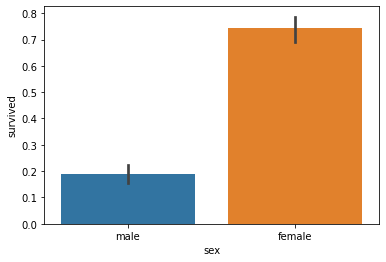

In [12]:
sns.barplot(x="sex", y="survived", data=titanic1_df)
print("Percentage of females who survived is", titanic1_df["survived"][titanic1_df["sex"] == 'female'].value_counts(normalize = True)[1]*100)
print("Percentage of males who survived is", titanic1_df["survived"][titanic1_df["sex"] == 'male'].value_counts(normalize = True)[1]*100)

In [13]:
sns.barplot(x="pclass", y="survived", data=titanic1_df)
print("Percentage of Pclass 1 who survived is", titanic1_df["survived"][titanic1_df["pclass"] == 1].value_counts(normalize = True)[1]*100)
print("Percentage of Pclass 2 who survived is", titanic1_df["survived"][titanic1_df["pclass"] == 2].value_counts(normalize = True)[1]*100)
print("Percentage of Pclass 3 who survived:", titanic1_df["survived"][titanic1_df["pclass"] == 3].value_counts(normalize = True)[1]*100)

Percentage of Pclass 1 who survived is 62.96296296296296
Percentage of Pclass 2 who survived is 47.28260869565217
Percentage of Pclass 3 who survived: 24.236252545824847


In [14]:
fig = plt.figure(figsize=(12,5))
fig.add_subplot(121)
plt.title('TRAIN - Age/Sex per Passenger Class')
sns.barplot(data=titanic1_df, x='pclass',y='age',hue='sex')

In [15]:
meanAgeTrnMale = round(titanic1_df[(titanic_df['sex'] == "male")]['age'].groupby(titanic1_df['pclass']).mean(),2)
meanAgeTrnFeMale = round(titanic1_df[(titanic_df['sex'] == "female")]['age'].groupby(titanic1_df['pclass']).mean(),2)


print('\n\t\tMEAN AGE PER SEX PER PCLASS')
print(pd.concat([meanAgeTrnMale, meanAgeTrnFeMale], axis = 1,keys= ['Male','Female']))

NameError: name 'titanic_df' is not defined

In [16]:
meanAgeTrnMale = round(titanic_df[(titanic1_df['sex'] == "male")]['age'].groupby(titanic1_df['pclass']).mean(),2)
meanAgeTrnFeMale = round(titanic_df[(titanic1_df['sex'] == "female")]['age'].groupby(titanic1_df['pclass']).mean(),2)


print('\n\t\tMEAN AGE PER SEX PER PCLASS')
print(pd.concat([meanAgeTrnMale, meanAgeTrnFeMale], axis = 1,keys= ['Male','Female']))

NameError: name 'titanic_df' is not defined

In [17]:
meanAgeTrnMale = round(titanic1_df[(titanic1_df['sex'] == "male")]['age'].groupby(titanic1_df['pclass']).mean(),2)
meanAgeTrnFeMale = round(titanic1_df[(titanic1_df['sex'] == "female")]['age'].groupby(titanic1_df['pclass']).mean(),2)


print('\n\t\tMEAN AGE PER SEX PER PCLASS')
print(pd.concat([meanAgeTrnMale, meanAgeTrnFeMale], axis = 1,keys= ['Male','Female']))


		MEAN AGE PER SEX PER PCLASS
         Male  Female
pclass               
1       41.28   34.61
2       30.74   28.72
3       26.51   21.75


In [18]:
sns.barplot(x="sibsp", y="survived", data=titanic_df)
print("Percentage of SibSp 0 who survived is", titanic1_df["survived"][titanic1_df["sibsp"] == 0].value_counts(normalize = True)[1]*100)
print("Percentage of SibSp 1 who survived is", titanic1_df["survived"][titanic1_df["sibsp"] == 1].value_counts(normalize = True)[1]*100)
print("Percentage of SibSp 2 who survived is", titanic1_df["survived"][titanic1_df["sibsp"] == 2].value_counts(normalize = True)[1]*100)

NameError: name 'titanic_df' is not defined

In [19]:
sns.barplot(x="sibsp", y="survived", data=titanic1_df)
print("Percentage of SibSp 0 who survived is", titanic1_df["survived"][titanic1_df["sibsp"] == 0].value_counts(normalize = True)[1]*100)
print("Percentage of SibSp 1 who survived is", titanic1_df["survived"][titanic1_df["sibsp"] == 1].value_counts(normalize = True)[1]*100)
print("Percentage of SibSp 2 who survived is", titanic1_df["survived"][titanic1_df["sibsp"] == 2].value_counts(normalize = True)[1]*100)

Percentage of SibSp 0 who survived is 34.53947368421053
Percentage of SibSp 1 who survived is 53.588516746411486
Percentage of SibSp 2 who survived is 46.42857142857143


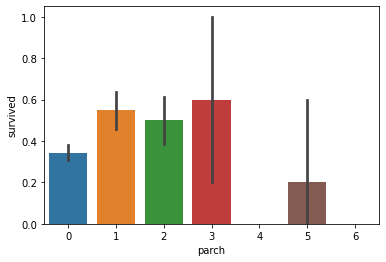

Percentage of parch 0 who survived is 34.365781710914455
Percentage of parch 1 who survived is 55.08474576271186
Percentage of parch 2 who survived is 50.0
Percentage of parch 3 who survived is 60.0


In [20]:
sns.barplot(x="parch", y="survived", data=titanic1_df)
plt.show()
print("Percentage of parch 0 who survived is", titanic1_df["survived"][titanic1_df["parch"] == 0].value_counts(normalize = True)[1]*100)
print("Percentage of parch 1 who survived is", titanic1_df["survived"][titanic1_df["parch"] == 1].value_counts(normalize = True)[1]*100)
print("Percentage of parch 2 who survived is", titanic1_df["survived"][titanic1_df["parch"] == 2].value_counts(normalize = True)[1]*100)
print("Percentage of parch 3 who survived is", titanic1_df["survived"][titanic1_df["parch"] == 3].value_counts(normalize = True)[1]*100)


In [21]:
titanic1_df["age"] = titanic1_df["age"].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
titanic1_df['agegroup'] = pd.cut(titanic1_df['age'], bins, labels = labels)
sns.barplot(x="agegroup", y="survived", data=titanic_df)
plt.show()

NameError: name 'titanic_df' is not defined

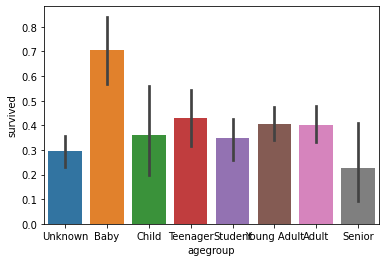

In [22]:
titanic1_df["age"] = titanic1_df["age"].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
titanic1_df['agegroup'] = pd.cut(titanic1_df['age'], bins, labels = labels)
sns.barplot(x="agegroup", y="survived", data=titanic1_df)
plt.show()

In [23]:
g = sns.FacetGrid(titanic1_df, col='survived')
g.map(plt.hist, 'age', bins=20)

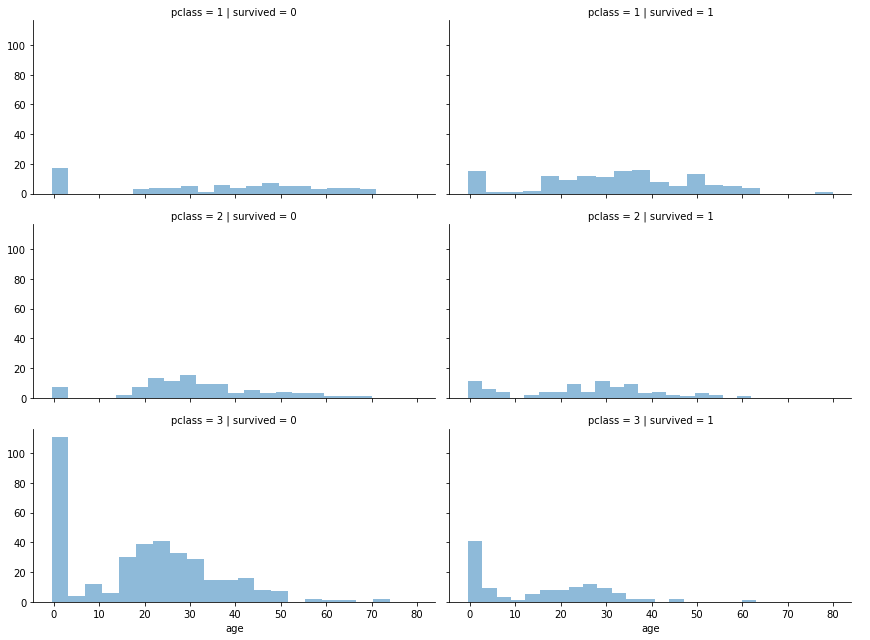

In [24]:
grid = sns.FacetGrid(titanic1_df, col='survived', row='pclass', size=3, aspect=2)
grid.map(plt.hist, 'age', alpha=.5, bins=20)
grid.add_legend();

In [25]:
#create a combined group of both datasets
combine = [titanic1_df, test1_df]

#extract a title for each Name in the train and test datasets
for dataset in combine:
    dataset['Title'] = dataset.name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(titanic1_df['Title'],titanic1_df['sex'])

sex       female  male
Title                 
Capt           0     1
Col            0     2
Countess       1     0
Don            0     1
Dr             1     6
Jonkheer       0     1
Lady           1     0
Major          0     2
Master         0    40
Miss         182     0
Mlle           2     0
Mme            1     0
Mr             0   517
Mrs          125     0
Ms             1     0
Rev            0     6
Sir            0     1

In [26]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt', 'Col',
    'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
    
    dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

titanic1_df[['Title', 'survived']].groupby(['Title'], as_index=False).mean()

Title  survived
0  Master  0.575000
1    Miss  0.702703
2      Mr  0.156673
3     Mrs  0.793651
4    Rare  0.285714
5   Royal  1.000000

In [27]:
print("Conclusions: ")
print("Females have a much higher chance of survival than males.")
print("People with higher socioeconomic class had a higher rate of survival")
print("People with no siblings or spouses were less to likely to survive than those with one or two")
print("People traveling alone are less likely to survive than those with 1-3 parents or children.")
print("Babies are more likely to survive than any other age group.")
print("People with a recorded Cabin number are, in fact, more likely to survive.")

Conclusions: 
Females have a much higher chance of survival than males.
People with higher socioeconomic class had a higher rate of survival
People with no siblings or spouses were less to likely to survive than those with one or two
People traveling alone are less likely to survive than those with 1-3 parents or children.
Babies are more likely to survive than any other age group.
People with a recorded Cabin number are, in fact, more likely to survive.
